#  In Depth: Principal Component Analysis

In this notebook, we will explore one of the most widely used unsupervised algorithms: Principal Component Analysis (PCA).

While PCA is primarily a dimensionality reduction technique, it also serves as a valuable tool for visualization, noise filtering, feature extraction, engineering, and much more.

After a brief conceptual overview of the PCA algorithm, we will examine a couple of examples that highlight these additional applications.

Let’s begin with the standard imports:

In [30]:
# Importing necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plotting style using Seaborn
sns.set_style('whitegrid')

## Introducing Principal Component Analysis

Principal Component Analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is most easily visualized using a two-dimensional dataset.

Consider the following figure, which displays 200 data points:

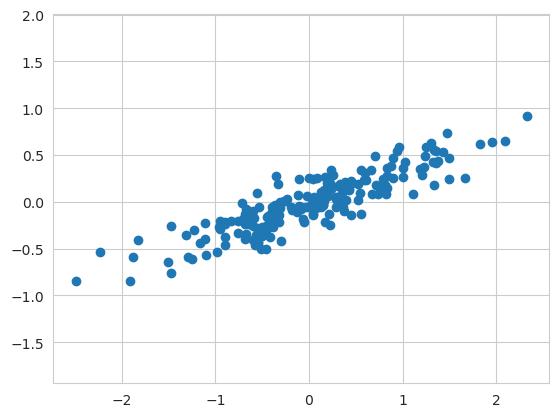

In [31]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

At a glance, it is evident that there is a nearly linear relationship between the *x* and *y* variables. This situation resembles linear regression; however, the context here is slightly different. Instead of attempting to *predict* the *y* values from the *x* values, the goal of this unsupervised learning problem is to understand the *relationship* between the *x* and *y* values.

In Principal Component Analysis (PCA), this relationship is quantified by identifying the *principal axes* within the data, which are then used to describe the dataset. Using Scikit-Learn's `PCA` estimator, we can compute this as follows:

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit process learns several quantities from the data, with the most important being the components and the explained variance:

In [33]:
help("sklearn.decomposition.PCA.components_")

No Python documentation found for 'sklearn.decomposition.PCA.components_'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [34]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [35]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To understand what these numbers represent, let's visualize them as vectors over the input data. We will use the components to define the direction of the vectors and the explained variance to determine the squared length of each vector (see the figure below):

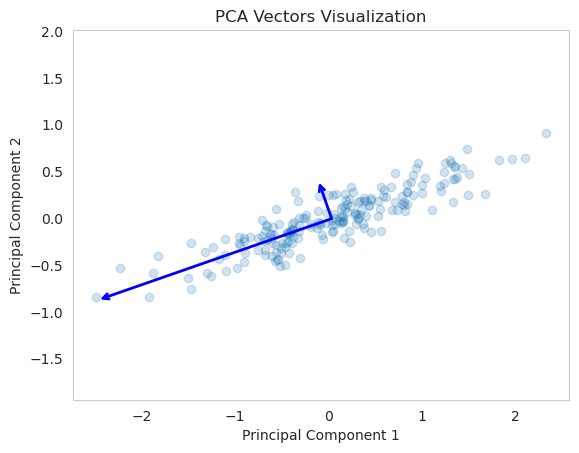

In [36]:
def draw_vector(v0, v1, ax=None, color='black'):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, color=color, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Draw vectors with specified color
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # Scale the vector for visualization
    draw_vector(pca.mean_, pca.mean_ + v, color='blue')  # Change color here

plt.axis('equal')
plt.title('PCA Vectors Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

These vectors represent the principal axes of the data, with the length of each vector indicating its importance in describing the data distribution. More specifically, the length reflects the variance of the data when projected onto that axis. The projection of each data point onto the principal axes constitutes the principal components of the dataset.

### PCA as Dimensionality Reduction

Applying PCA for dimensionality reduction involves eliminating one or more of the smallest principal components. This results in a lower-dimensional projection of the data that retains the maximum variance.

Below is an example of using PCA as a dimensionality reduction transformation:

In [37]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data (see the following figure):

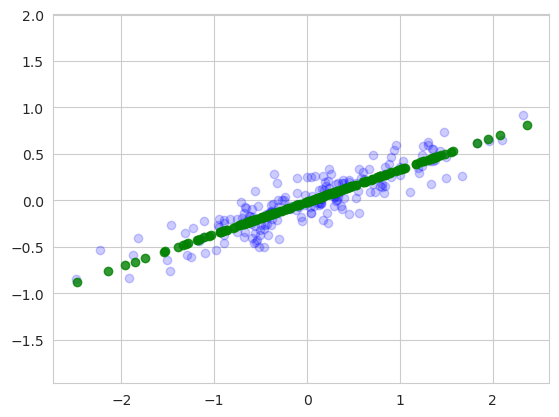

In [38]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c='blue')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c='green')
plt.axis('equal');

The light points represent the original data, while the dark points indicate the projected version. This distinction clarifies the meaning of PCA dimensionality reduction: the information along the least important principal axis (or axes) is removed, leaving only the components of the data that capture the highest variance.

The fraction of variance that is discarded—proportional to the spread of points around the line formed in the previous figure—provides a rough measure of how much "information" is lost during this dimensionality reduction.

This reduced-dimension dataset is, in many respects, "good enough" to capture the most important relationships among the points. Despite reducing the number of features by 50%, the overall relationships between the data points remain largely preserved.

### PCA for Visualization: Handwritten Digits

The usefulness of dimensionality reduction may not be entirely apparent in just two dimensions, but it becomes clear when examining high-dimensional data. To illustrate this, let's explore the application of PCA to the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

We'll start by loading the data:

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the digits dataset consists of 8 × 8–pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two:

In [40]:
pca = PCA(0.8)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
len(pca.components_)

(1797, 64)
(1797, 13)


13

We can now plot the first two principal components of each point to learn about the data, as seen in the following figure:

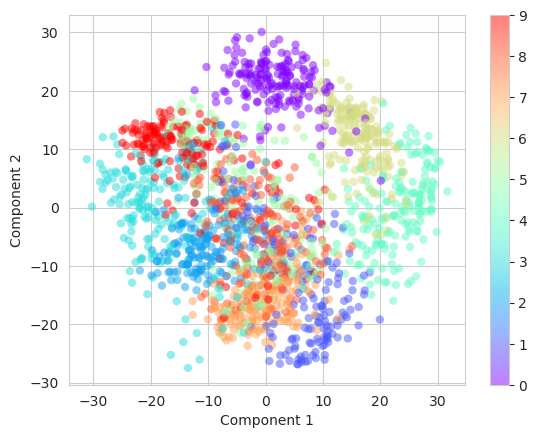

In [41]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps['rainbow'], vmin=0, vmax=9)  # Adjust vmin and vmax based on your target labels
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the data in two dimensions, and we have done this in an unsupervised manner—that is, without reference to the labels.

### What Do the Components Mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimensionality of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data (the following figure). However, it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some predefined contribution from each pixel, and write something like:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
the following figure shows a similar depiction of reconstructing the same digit using the mean plus the first eight PCA basis functions.

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean, plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel basis of the input data.

### Choosing the Number of Components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components (see the following figure):

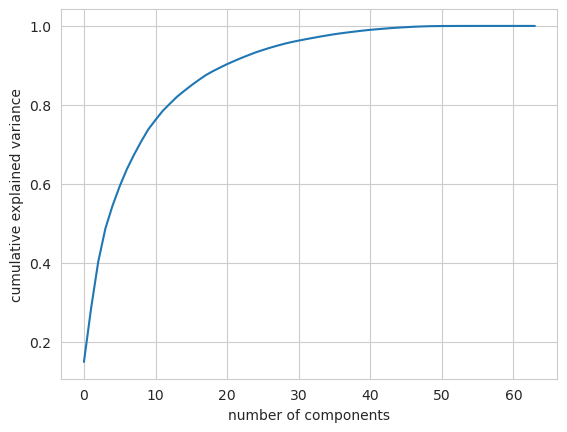

In [42]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits data the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

This tells us that our 2-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in its features.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So, if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free input samples (the following figure):

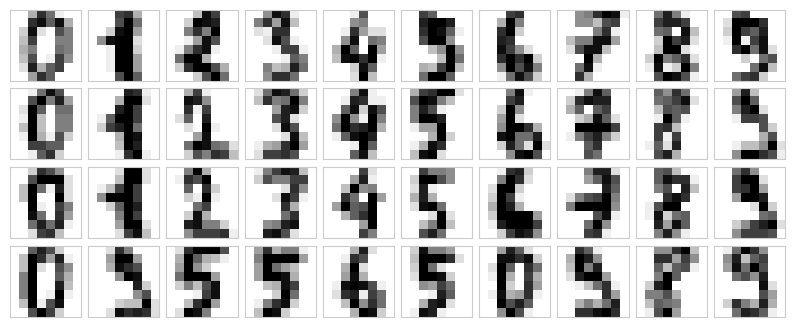

In [43]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now let's add some random noise to create a noisy dataset, and replot it (the following figure):

In [44]:
rng = np.random.default_rng(42)
rng.normal(10, 2)

10.609434159508863

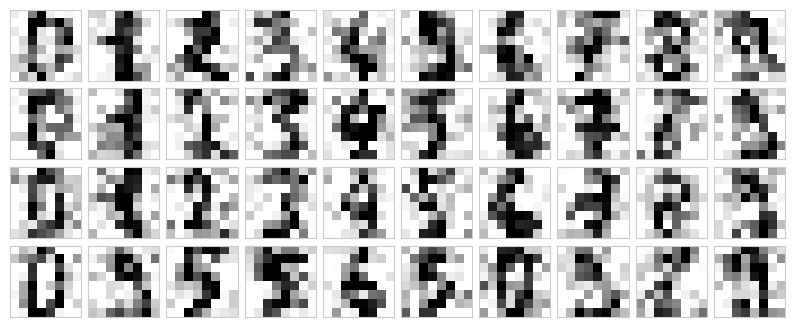

In [45]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

The visualization makes the presence of this random noise clear.
Let's train a PCA model on the noisy data, requesting that the projection preserve 50% of the variance:

In [54]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components, out of the 64 original features.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits; the following figure shows the result:

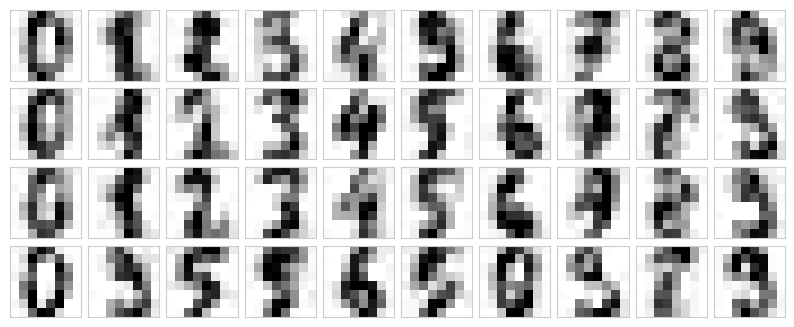

In [55]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional principal component representation, which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces

In this section, we will explore the use of PCA for facial recognition. We will examine the concepts involved and how they apply to the [Labeled Faces in the Wild (LFW)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) dataset made available through Scikit-Learn:


In [48]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use the `"random"` eigensolver in the `PCA` estimator: it uses a randomized method to approximate the first $N$ principal components more quickly than the standard approach, at the expense of some accuracy. This trade-off can be useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [49]:
pca = PCA(150, svd_solver='randomized', random_state=42)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as *eigenvectors*,
so these types of images are often called *eigenfaces*; as you can see in the following figure, they are as creepy as they sound):

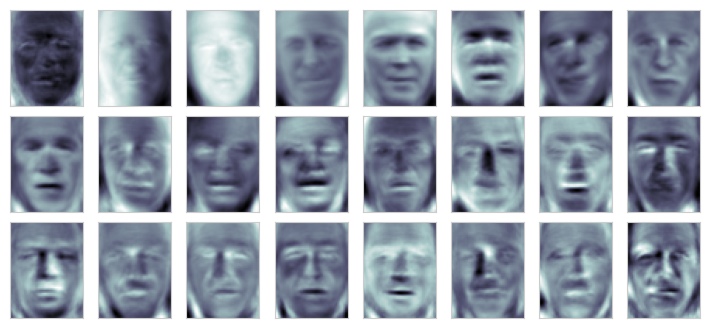

In [50]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving (see the following figure):

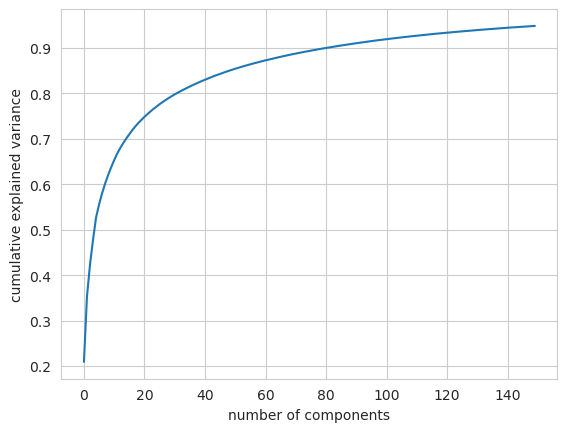

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The 150 components we have chosen account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components (see the following figure):

In [52]:
# Compute the components and projected faces
pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

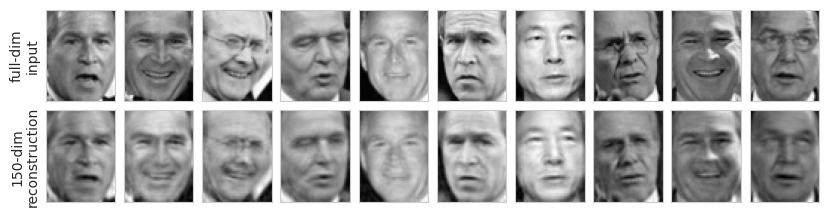

In [53]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row shows the input images, while the bottom row displays the reconstructions of these images using just 150 of the approximately 3,000 initial features. This visualization illustrates the effectiveness of PCA for dimensionality reduction. Although it reduces the dimensionality of the data by nearly a factor of 20, the projected images retain enough information for us to recognize the individuals by eye. This means that our classification algorithm can be trained on 150-dimensional data instead of 3,000-dimensional data, which can lead to more efficient classification depending on the chosen algorithm.

## Summary

In this notebook, we explored the use of principal component analysis (PCA) for dimensionality reduction, visualization of high-dimensional data, noise filtering, and feature selection. Due to its versatility and interpretability, PCA has proven effective in various contexts and disciplines.

When presented with a high-dimensional dataset, I often start with PCA to visualize the relationships between points (as we did with the digits data), understand the main sources of variance in the data (as demonstrated with the eigenfaces), and assess the intrinsic dimensionality by plotting the explained variance ratio. While PCA is not suitable for every high-dimensional dataset, it provides a straightforward and efficient way to gain insights into such data.

PCA's main weakness is its sensitivity to outliers. Consequently, several robust variants of PCA have been developed, many of which iteratively discard data points that are poorly represented by the initial components. Scikit-Learn includes a variety of interesting PCA variants in the `sklearn.decomposition` submodule; one example is `SparsePCA`, which introduces a regularization term to enforce sparsity of the components.